In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta

#customizing Matplotlib Style
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,2880.000000,2940.000000,2879.000000,2928.250000,2891.489258,2681440
2021-01-04,2950.000000,3050.750000,2940.949951,3039.449951,3001.292969,5113293
2021-01-05,3039.600098,3114.250000,3039.600098,3093.000000,3054.170898,5801309
2021-01-06,3100.000000,3113.500000,3037.199951,3051.500000,3013.191650,3726716
2021-01-07,3075.000000,3080.850098,3000.250000,3032.800049,2994.726562,3717827
...,...,...,...,...,...,...
2021-12-27,3671.000000,3700.000000,3653.100098,3696.100098,3689.616699,1534135
2021-12-28,3710.000000,3725.000000,3693.850098,3706.550049,3700.048340,1456218
2021-12-29,3692.250000,3719.949951,3685.000000,3694.699951,3688.218994,1456923


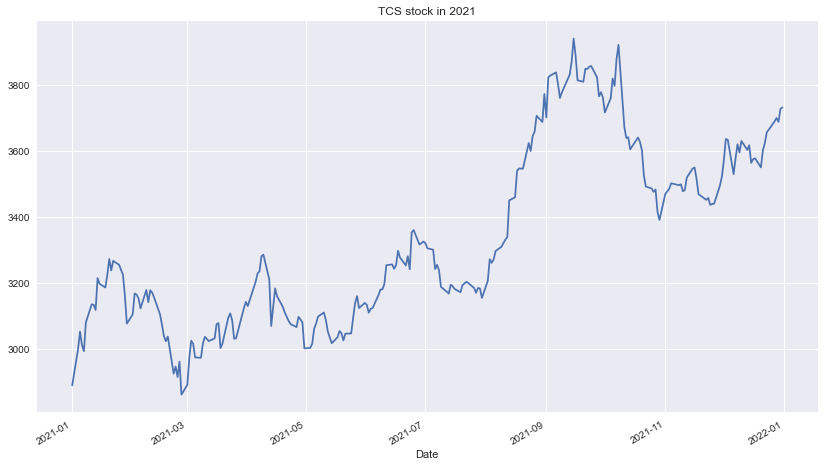

In [2]:
df = yf.download("TCS.NS",start = "2021-01-01",
end = "2021-12-31")
df["Adj Close"].plot(title="TCS stock in 2021");
df

## Bollinger Bands

- Bollinger bands are a famous technical evaluation approach in inventory trading. Based on ancient deals, it is utilised to determine out if a marketplace is typically excessive or low in fee. Bollinger Bands are fee bands which are built with a widespread deviation above and underneath a easy transferring common. Using the median band, we buy or promote the inventory. When the median band contacts or is going underneath the decrease band, we buy the inventory, and while the median band rises and almost crosses over the higher band, we promote the inventory.


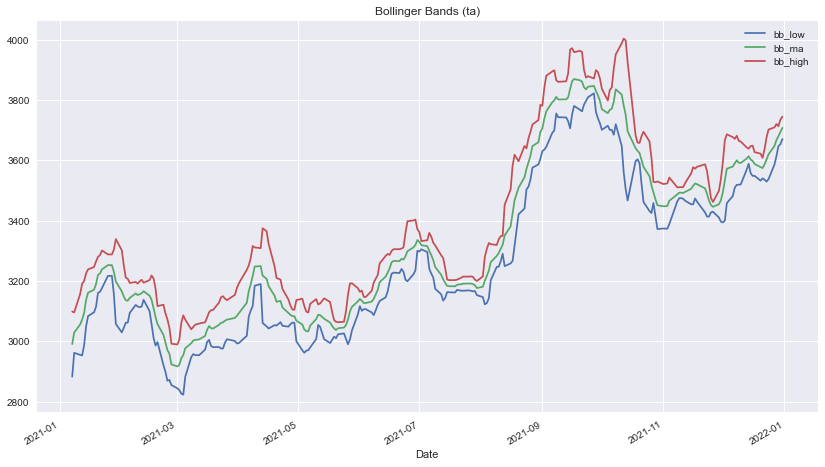

In [3]:
#instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], window = 5 , window_dev = 2 ) 

ta_df = df.copy()

#add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()


ta_df[["bb_low" ,"bb_ma" , "bb_high"]].plot(title = "Bollinger Bands (ta)")
plt.show()

- We used TCS inventory for Bollinger bands, we are taking data for a year 2021, the traditional rolling common of 20 may be insufficient, so I'm taking for 5, which offers us extra correct findings and a widespread deviation of 2.
- TCS's trend has rocketed from roughly  3200 to 3800 INR in the month of October, which is almost a 6000 INR growth. However, we can see a dip in november 2021 where price dropped to 3400 INR, and after that it is gradually increasing. We can also additionally purchase the inventory on January 2022, consistent with the plot, because it's miles lower, and it'll climb, consistent with the plot the usage of Bollinger bands.

#### Trend Analysis
- In the month of March, we can notice a significant drop in the stock's price, which is due to the fact that covid-19 cases were sky-rocketing at the time; it was the second wave of covid in India at the time. TCS steadily recovered after that, reaching its peak in October due to following reasons. 
    - TCS partnered with NICE Actimize in September 2021 to offer clients complete financial crime compliance solutions. TCS and Transport for London (TfL) signed a 10-year agreement in September 2021 to digitally overhaul private hire cars and taxi licence administration.
    - TCS partnered with Avianca in September 2021 to help the airline expedite its cloud transformation. The company announced new Google Cloud Garages for its enterprise clients in August 2021.
    - Tata Consultancy Services (TCS) renewed its 17-year collaboration with Virgin Atlantic in June 2021 to assist the latter in entering a new phase of "recovery and expansion." TCS will be in charge of the airline's end-to-end operational management and digital transformation alone. 

## Standard Deviations

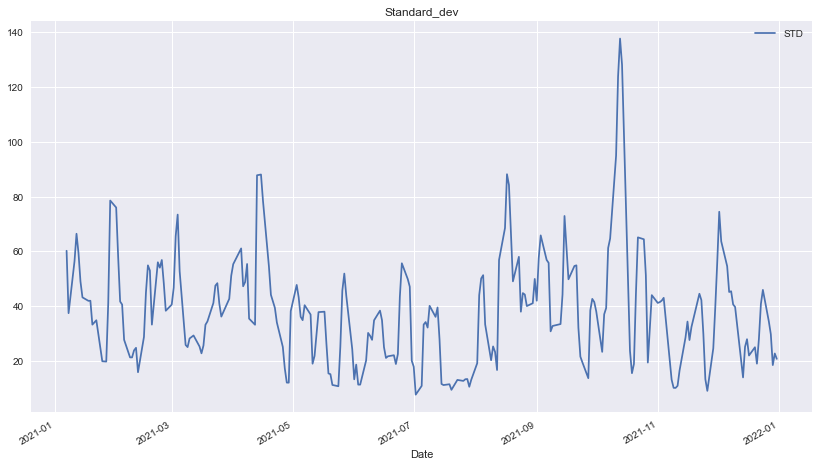

In [4]:
period = 5
ta_df['STD'] = df['Adj Close'].rolling(window=period).std() 

ta_df[["STD"]].plot(title = "Standard_dev")
plt.show()

## Mean

<AxesSubplot:title={'center':'Mean'}, xlabel='Date'>

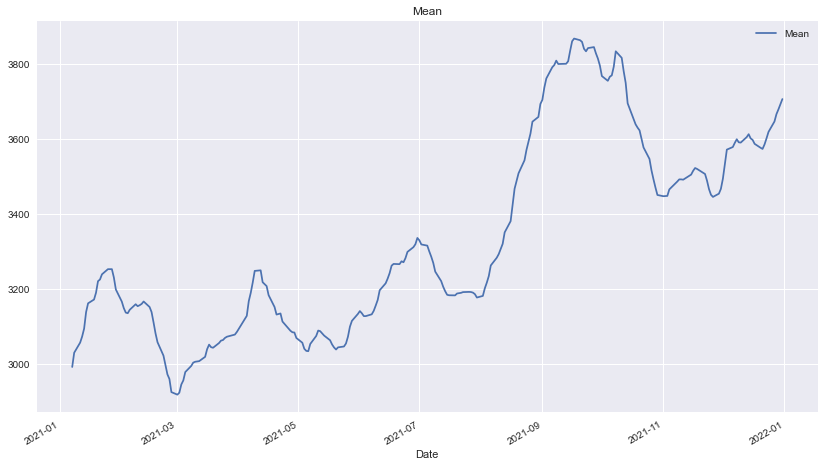

In [5]:
ta_df['Mean'] = df['Adj Close'].rolling(window=period).mean()
ta_df[["Mean"]].plot(title = "Mean")